In [1]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 1))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input1.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
# first and last row special == no flow boundaries
    for jcol in range(ncols):
        head [0    ][jcol ] = head[1][jcol ]
        head [nrows-1][jcol ] = head[nrows-2][jcol ]
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 31
End Calculations
Iterations    =  31
Closure Error =  0.0
Head Map
----


0 [100.  90.  80.  70.  60.]
1 [100.  90.  80.  70.  60.]
2 [100.  90.  80.  70.  60.]
3 [100.  90.  80.  70.  60.]
4 [100.  90.  80.  70.  60.]
----


In [2]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input2.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
# first and last row special == no flow boundaries
    for jcol in range(ncols):
        head [0    ][jcol ] = head[1][jcol ]
        head [nrows-1][jcol ] = head[nrows-2][jcol ]
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 7972
End Calculations
Iterations    =  7972
Closure Error =  0.0
Head Map
----
0 [100.     99.758  99.513  99.259  98.995  98.715  98.417  98.098  97.755
  97.383  96.9    96.329  95.729  95.167  94.674  94.159  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
1 [100.     99.758  99.513  99.259  98.994  98.715  98.416  98.097  97.755
  97.383  96.9    96.329  95.728  95.167  94.674  94.158  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
2 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.383  96.9    96.329  95.727  95.166  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
3 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.385  96.901  96.329  95.726  95.164  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
4 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.387  96

In [3]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input2GB.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 7972
End Calculations
Iterations    =  7972
Closure Error =  0.0
Head Map
----
0 [100.     99.758  99.513  99.259  98.995  98.715  98.417  98.098  97.755
  97.383  96.9    96.329  95.729  95.167  94.674  94.159  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
1 [100.     99.758  99.513  99.259  98.994  98.715  98.416  98.097  97.755
  97.383  96.9    96.329  95.728  95.167  94.674  94.158  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
2 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.383  96.9    96.329  95.727  95.166  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
3 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.385  96.901  96.329  95.726  95.164  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
4 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.387  96

In [4]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

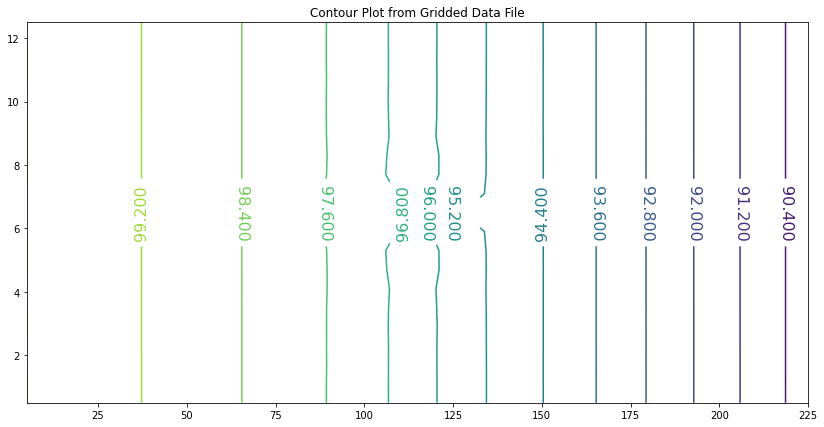

In [5]:
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 45)
lat = numpy.linspace(min(coord_y), max(coord_y), 21)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

In [6]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input3.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 519
End Calculations
Iterations    =  519
Closure Error =  0.0
Head Map
----
0 [10.    10.    10.    10.    10.    10.    10.    10.    10.    10.
 10.    10.     8.819  8.595  8.593  1.414  1.412  1.187  0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
1 [10.     9.977  9.954  9.928  9.899  9.866  9.826  9.777  9.715  9.633
  9.512  9.3    8.819  8.595  8.593  1.414  1.412  1.187  0.705  0.492
  0.371  0.289  0.228  0.18   0.141  0.109  0.082  0.058  0.037  0.018
  0.   ]
2 [10.     9.956  9.91   9.86   9.803  9.738  9.661  9.567  9.451  9.305
  9.116  8.868  8.562  8.372  8.37   1.638  1.636  1.446  1.139  0.891
  0.703  0.557  0.443  0.35   0.275  0.212  0.16   0.114  0.073  0.036
  0.   ]
3 [10.     9.936  9.87   9.798  9.717  9.623  9.512  9.379  9.217  9.019
  8.778  8.493  8.189  7.959  7.957  2.051  2.05   1.82   1.515  1.231
  0.991  0.795  0.635  0.504  0.396  0.306

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

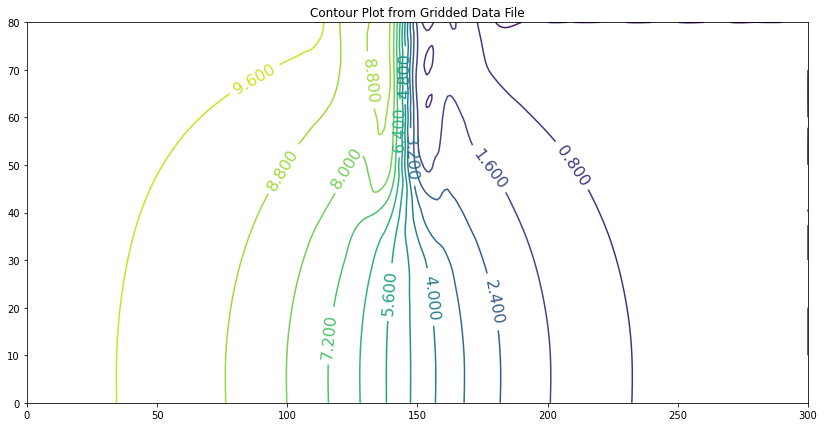

In [7]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

In [8]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input4.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 412
End Calculations
Iterations    =  412
Closure Error =  0.0
Head Map
----
0 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
1 [10.     9.975  9.949  9.921  9.889  9.853  9.811  9.761  9.701  9.632
  9.552  9.466  9.384  9.329  9.329]
2 [10.     9.951  9.9    9.845  9.783  9.712  9.629  9.531  9.413  9.274
  9.111  8.928  8.742  8.602  8.602]
3 [10.     9.93   9.856  9.776  9.687  9.584  9.463  9.319  9.147  8.939
  8.69   8.393  8.056  7.734  7.734]
4 [10.     9.911  9.818  9.717  9.604  9.473  9.32   9.137  8.916  8.647
  8.316  7.9    7.353  6.544  5.   ]
5 [10.     9.896  9.788  9.67   9.538  9.385  9.206  8.992  8.733  8.416
  8.026  7.538  6.913  6.088  5.   ]
6 [10.     9.886  9.767  9.637  9.492  9.325  9.127  8.891  8.607  8.26
  7.835  7.313  6.672  5.895  5.   ]
7 [10.     9.881  9.756  9.621  9.469  9.293  9.087  8.84   8.543  8.181
  7.741  7.207  6.566  5.82   5.   ]
8 [10.     9.881

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

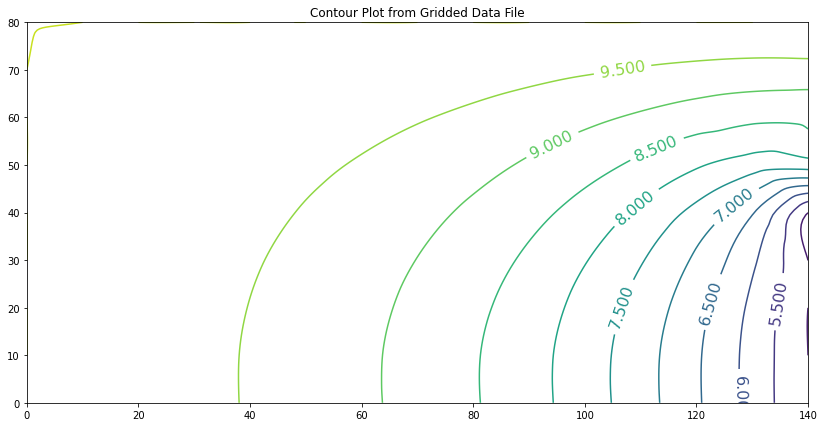

In [9]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

In [10]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input5.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Transmissivity Arrays
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (-1*pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
print("----")


Exit iterations in velocity potential because tolerance met 
Iterations = 806
End Calculations
Iterations    =  806
Closure Error =  0.0
Minimum Head 15.09
Head Map
----
0 [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
1 [30.    29.914 29.828 29.743 29.659 29.577 29.499 29.426 29.36  29.303
 29.258 29.225 29.206 29.202 29.211 29.235 29.271 29.318 29.374 29.436
 29.503 29.572 29.643 29.715 29.787 29.858 29.929 30.   ]
2 [30.    29.827 29.655 29.484 29.315 29.15  28.992 28.844 28.71  28.595
 28.502 28.436 28.398 28.389 28.409 28.457 28.531 28.627 28.74  28.867
 29.002 29.143 29.286 29.43  29.574 29.716 29.858 30.   ]
3 [30.    29.74  29.481 29.223 28.968 28.717 28.476 28.248 28.042 27.864
 27.721 27.619 27.56  27.547 27.579 27.654 27.769 27.918 28.094 28.29
 28.497 28.711 28.928 29.145 29.361 29.575 29.788 30.   ]
4 [30.    29.653 29.306 28.96  28.615 28.275 27.945 27.632 27.346 27.098
 26.899 26.757 26.677 26.66  26.705

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

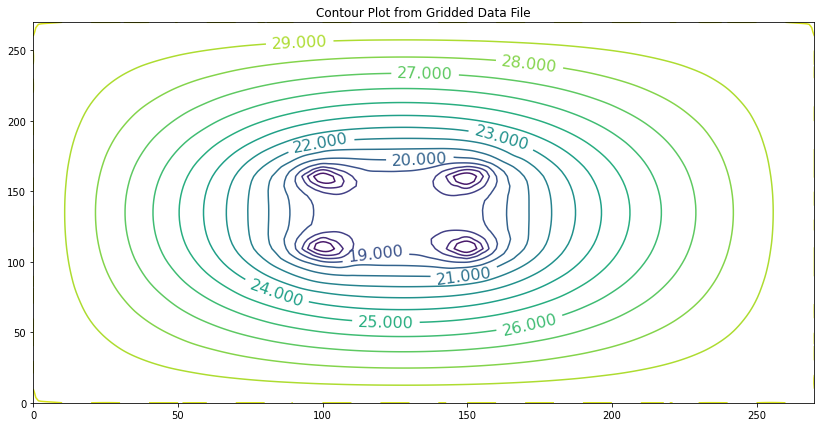

In [11]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 15)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

In [12]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input6.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (-1*pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
## Transmissivity Arrays
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            amat[irow][jcol] = ((head[irow-1][jcol  ] * hydcondx[irow-1][jcol  ]+ head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
            bmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]+ head[irow+1][jcol  ] * hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
            cmat[irow][jcol] = ((head[irow  ][jcol-1] * hydcondy[irow  ][jcol-1]+ head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
            dmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]+ head[irow  ][jcol+1] * hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right

# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,5))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
print("----")


Exit iterations in velocity potential because tolerance met 
Iterations = 807
End Calculations
Iterations    =  807
Closure Error =  0.0
Minimum Head 15.054
Head Map
----
0 [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
1 [30.    29.935 29.87  29.806 29.742 29.68  29.62  29.564 29.514 29.471
 29.436 29.411 29.396 29.393 29.4   29.418 29.446 29.482 29.525 29.572
 29.623 29.676 29.73  29.785 29.839 29.893 29.947 30.   ]
2 [30.    29.87  29.739 29.609 29.48  29.354 29.232 29.117 29.013 28.923
 28.851 28.799 28.769 28.762 28.778 28.815 28.873 28.948 29.036 29.135
 29.24  29.348 29.458 29.568 29.677 29.786 29.893 30.   ]
3 [30.    29.804 29.607 29.409 29.213 29.018 28.83  28.651 28.488 28.346
 28.232 28.15  28.104 28.093 28.119 28.179 28.271 28.39  28.53  28.684
 28.847 29.014 29.182 29.35  29.515 29.679 29.84  30.   ]
4 [30.    29.738 29.473 29.207 28.939 28.672 28.411 28.161 27.931 27.729
 27.567 27.451 27.385 27.371 27.4

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

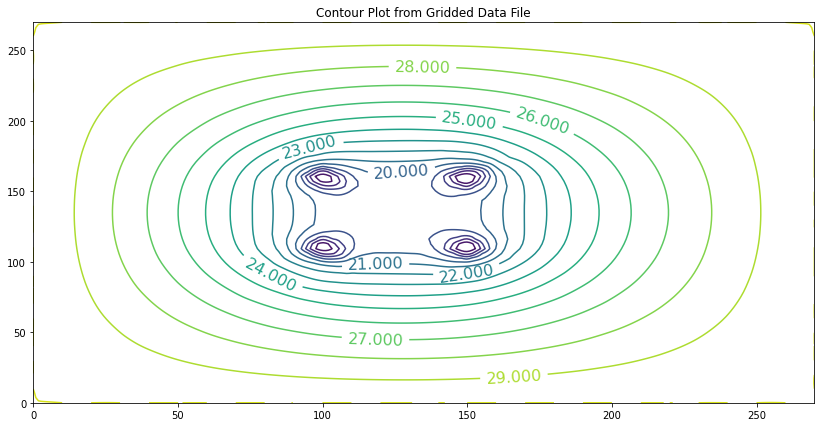

In [13]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 15)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')